<a href="https://colab.research.google.com/github/Br0d0brey/GoogleColabFiles/blob/main/laba_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

# считывание и просмотр данных

In [ ]:
# считываем данные
# Набор Данных Проблем Прогнозирования Займов
# нам нужно предсказать, одобрят ли кредит человеку в зависимости от имеющейся информации
X = pd.read_csv('dataset.csv')

FileNotFoundError: ignored

In [ ]:
X.shape

In [ ]:
X.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#проверка значении набора данных
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
X.isnull().sum()
# видим пропуски в 7 столбцах

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# числовые данные ("float64")
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# категориальные данные ("Object")
X.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001043,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# сразу удалю Loan_ID, т.к. этот столбец имеет только уникальные значения и не особо важен для модели
X.drop('Loan_ID', axis=1, inplace=True)

# посмотрим зависимую переменную

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Процент Y  : 0.69
Процент N  : 0.31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


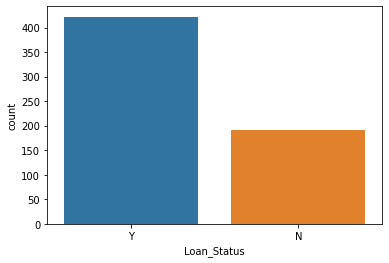

In [ ]:
plt.figure()
sns.countplot(X['Loan_Status']);

print('Процент Y  : %.2f' % (X['Loan_Status'].value_counts()[0] / len(X)))
print('Процент N  : %.2f' % (X['Loan_Status'].value_counts()[1] / len(X)))

# посмотрим переменные, в которых есть пропуски

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


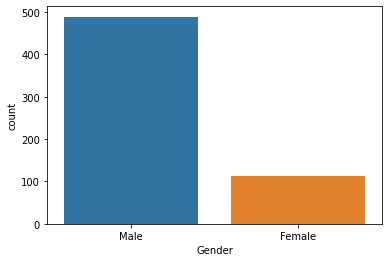

In [ ]:
# переменная Gender

sns.countplot(X['Gender'])

# видим, что мужчин больше, чем женщин, поэтому пустые строки лучше заполнить 'Male'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


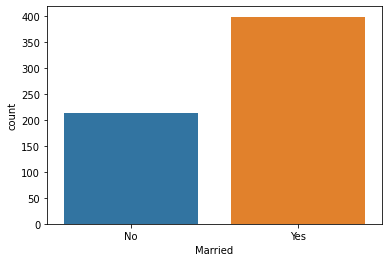

In [ ]:
# переменная Married

sns.countplot(X['Married'])

# в принципе, можем заполнить пропустки 'Yes', т.к таких значений в 2 раза больше

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


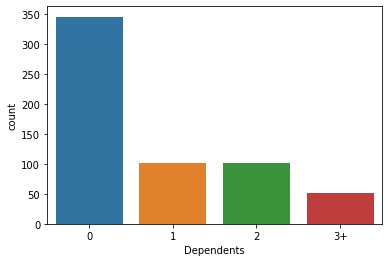

In [ ]:
# переменная Dependents(иждивенец, т.е. дети)

sns.countplot(X['Dependents'])

#большинство не имеют детей, поэтому можем заполнить пропуски 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


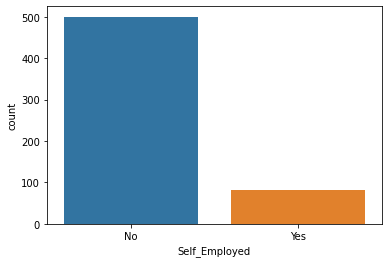

In [ ]:
# переменная Self_Employed (Частный предприниматель)

sns.countplot(X['Self_Employed'])

#большинство значений 'No', т.е пропуски можно заполнить им

In [ ]:
# переменная LoanAmount(Сумма займа)
print(X['LoanAmount'].value_counts()) # пропущенные значения можно заменить средним или медианой
# переменная Loan_Amount_Term(Срок кредита)
print(X['Loan_Amount_Term'].value_counts()) # здесь пропущенные значения можно заполнить "360", т.к их большинство

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [ ]:
# изменю тип Credit_History на object,чтобы посмотреть зависимость по графикам с целевой переменной и, потому что он все равно равен 1 или 0. 
# P.S. Потом поменяю его обратно
X['Credit_History'] = X['Credit_History'].astype('O')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


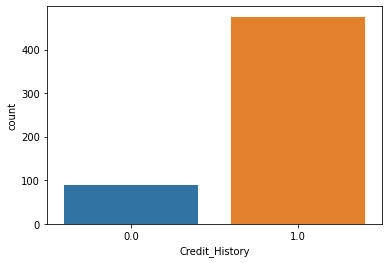

In [ ]:
# переменная Credit_History

sns.countplot(X['Credit_History'])

# большинство имеют кредитную историю "1", соответсвенно можно заполнить пропуски 1

# Заполняем пропуски

In [ ]:
X['Gender'].fillna('Male', inplace=True) 
X['Married'].fillna('Yes', inplace=True) 
X['Dependents'].fillna('0', inplace=True) 
X['Self_Employed'].fillna('No', inplace=True) 
X['LoanAmount'].fillna(X['LoanAmount'].median(), inplace= True)
X['Loan_Amount_Term'].fillna('360', inplace=True)
X['Credit_History'].fillna(1.0, inplace=True) 

In [ ]:
X.isnull().sum()
# все пропуски заполнены

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y


# Перекодируем признаки

In [ ]:
# кодируем следующие поля обычным способом (0 и 1)
X['Gender'] = pd.factorize(X['Gender'])[0]
X['Married'] = pd.factorize(X['Married'])[0]
X['Education'] = pd.factorize(X['Education'])[0]
X['Self_Employed'] = pd.factorize(X['Self_Employed'])[0]
X['Loan_Status'] = pd.factorize(X['Loan_Status'])[0]

In [ ]:
# кодируем поле Property_Area,Dependents методом дамми-кодирования
X = pd.concat([X,  pd.get_dummies(X['Property_Area'], prefix="Area")],  axis=1)
X = pd.concat([X,  pd.get_dummies(X['Dependents'], prefix="Dependents")],  axis=1)

In [ ]:
# удаляем старые поля Property_Area,Dependents
X.drop('Property_Area', axis=1, inplace=True)
X.drop('Dependents', axis=1, inplace=True)

In [ ]:
# данные поля переводим обратно в тип float64
X['Credit_History'] = X['Credit_History'].astype('float64')
X['Loan_Amount_Term'] = X['Loan_Amount_Term'].astype('float64')

In [ ]:
X.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,0,0,1,1,0,0,0
1,0,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,1,0,0
2,0,1,0,1,3000,0.0,66.0,360.0,1.0,0,0,0,1,1,0,0,0
3,0,1,1,0,2583,2358.0,120.0,360.0,1.0,0,0,0,1,1,0,0,0
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,0,1,1,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Loan_Status        614 non-null    int64  
 10  Area_Rural         614 non-null    uint8  
 11  Area_Semiurban     614 non-null    uint8  
 12  Area_Urban         614 non-null    uint8  
 13  Dependents_0       614 non-null    uint8  
 14  Dependents_1       614 non-null    uint8  
 15  Dependents_2       614 non-null    uint8  
 16  Dependents_3+      614 non

# использование Scikit-learn

In [ ]:
# указываем зависимую перменную
y = X.Loan_Status
x = X.drop('Loan_Status',1)

In [ ]:
# формируем из набора данных тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
from sklearn.neural_network import MLPClassifier
#создаем сеть с 2 скрытыми слоями по 30 нейронов и 5 нейронов
mlp = MLPClassifier(hidden_layer_sizes=(30,5), activation="relu", solver="sgd", random_state=10) # использование линейной функции активации для всей сети + для обучения сети используется стохастический градиентный спуск
#обучаем сеть на обучающей выборке
mlp.fit(X_train, y_train)
#проверяем точность на тестовой и обучающей выборке
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)*100))
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)*100))

Правильность на обучающем наборе: 68.23
Правильность на тестовом наборе: 70.73


In [ ]:
#делаем предсказания для всей тестовой выборки
mlp.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.neural_network import MLPClassifier
#создаем сеть
mlp = MLPClassifier(hidden_layer_sizes=(95,45), activation="tanh", solver="lbfgs", random_state=1) #Функция активации Танга или гиперболического тангенса + для обучения сети используется Логистическая функция регрессии
#обучаем сеть на обучающей выборке
mlp.fit(X_train, y_train)
#проверяем точность на тестовой и обучающей выборке
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)*100))
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)*100))

Правильность на обучающем наборе: 69.86
Правильность на тестовом наборе: 73.98


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#делаем предсказания для всей тестовой выборки
mlp.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# использование Keras 

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Создаем последовательную модель
model = Sequential() 

In [ ]:
# Добавим к модели полносвязный слой с 64 нейронами
model.add(layers.Dense(64, activation="sigmoid")) 

In [ ]:
# Добавим другой слой такого же размера: 
model.add(layers.Dense(64, activation="relu")) 

In [ ]:
# Добавим слой softmax с 10 выходами: 
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
# Компилируем модель
model.compile( loss="sparse_categorical_crossentropy",optimizer="SGD", metrics=["accuracy"])
# optimizer: Этот параметр определяет процедуру обучения. стохастический градиентный спуск
# loss: Это функция которая минимизируется в процессе обучения.  Категориальная редкая кросс-энтропия 

In [ ]:
# формируем из набора данных тестовую и обучающую выборки
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
# Обучаем сеть
# epochs: Обучение разбито на *эпохи*. Эпоха это одна итерация по всем входным данным 
# batch_size- размер батча – количества примеров обучающей выборки, использующихся при минимизации функции ошибки

history = model.fit(trainX, trainY, batch_size=30, epochs=5)

Epoch 1/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6713
Epoch 2/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6713
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6713
Epoch 4/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6713
Epoch 5/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6713


In [ ]:
# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(testX, testY)
print("Правильность на тестовом наборе:", round(scores[1] * 100, 2))

6/6 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7243
Правильность на тестовом наборе: 72.43
